In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
from glob import glob

In [ ]:
train_dir = '/content/drive/MyDrive/Datasets/train'
test_dir = '/content/drive/MyDrive/Datasets/val'

In [ ]:
num_classes = 3
image_size = (299, 299)
batch_size = 32
learning_rate = 0.001
epochs = 3

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1],3))

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation= 'relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
model = Sequential()

model.add(Flatten(input_shape=(64,64,3)))   ## 64,64,3 is for colord image
model.add(Dense(84,activation = 'sigmoid'))
model.add(Dense(30,activation = 'relu'))
model.add(Dense(3,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense_2 (Dense)             (None, 84)                1032276   
                                                                 
 dense_3 (Dense)             (None, 30)                2550      
                                                                 
 dense_4 (Dense)             (None, 3)                 93        
                                                                 
Total params: 1034919 (3.95 MB)
Trainable params: 1034919 (3.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model = Model(inputs=base_model.input, outputs = predictions)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 14631 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_generator.n //batch_size
)

Epoch 1/3
457/457 [==============================] - 4301s 9s/step - loss: 0.0252 - accuracy: 0.9929 - val_loss: 0.0090 - val_accuracy: 0.9993
Epoch 2/3
457/457 [==============================] - 3960s 9s/step - loss: 0.0105 - accuracy: 0.9971 - val_loss: 0.0209 - val_accuracy: 0.9986
Epoch 3/3
457/457 [==============================] - 3971s 9s/step - loss: 0.0084 - accuracy: 0.9979 - val_loss: 0.0164 - val_accuracy: 0.9993


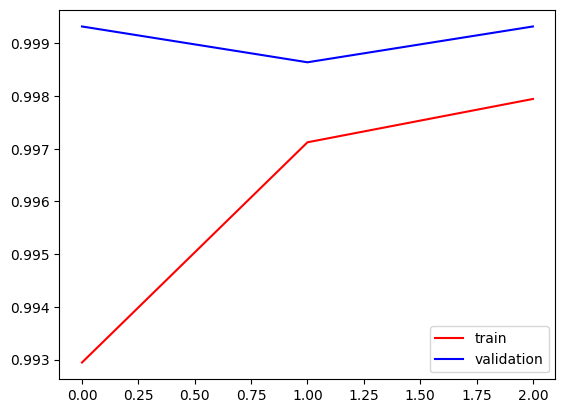

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

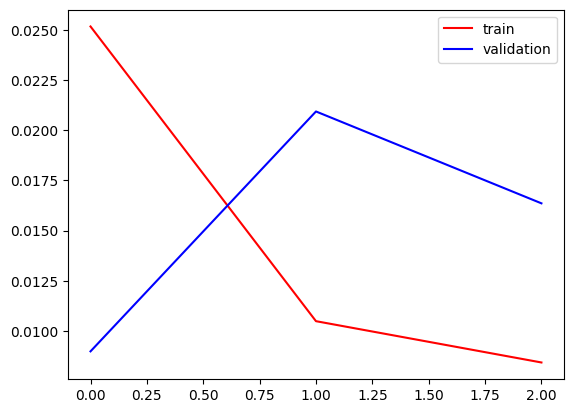

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()